In [51]:
# !pip install requests
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load dataset
df = pd.read_csv('../Data/neso_historic_demand_combined.csv')

# exploring

In [53]:
# 1. Basic info and preview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434014 entries, 0 to 434013
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SETTLEMENT_DATE            0 non-null       float64
 1   SETTLEMENT_PERIOD          434014 non-null  int64  
 2   ND                         434014 non-null  int64  
 3   TSD                        363886 non-null  float64
 4   ENGLAND_WALES_DEMAND       434014 non-null  int64  
 5   EMBEDDED_WIND_GENERATION   328846 non-null  float64
 6   EMBEDDED_WIND_CAPACITY     328846 non-null  float64
 7   EMBEDDED_SOLAR_GENERATION  293758 non-null  float64
 8   EMBEDDED_SOLAR_CAPACITY    293758 non-null  float64
 9   NON_BM_STOR                434014 non-null  int64  
 10  PUMP_STORAGE_PUMPING       434014 non-null  int64  
 11  IFA_FLOW                   434014 non-null  int64  
 12  IFA2_FLOW                  293758 non-null  float64
 13  BRITNED_FLOW               29

In [54]:
print(df.head())

   SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND      TSD  ENGLAND_WALES_DEMAND  \
0              NaN                  1  37910  38704.0                 33939   
1              NaN                  1  34221  35837.0                 30659   
2              NaN                  1  36626  38278.0                 32841   
3              NaN                  1  36713  38749.0                 32988   
4              NaN                  1  35293  38323.0                 31847   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      54.0                  1403.0   
1                      62.0                  1403.0   
2                     229.0                  1403.0   
3                     225.0                  1403.0   
4                     358.0                  1403.0   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  ...  \
0                        0.0                      0.0            0  ...   
1                        0.0                

In [55]:
# 3. Summarize missing values
missing_count = df.isnull().sum()
print("Missing values per column:\n", missing_count)

Missing values per column:
 SETTLEMENT_DATE              434014
SETTLEMENT_PERIOD                 0
ND                                0
TSD                           70128
ENGLAND_WALES_DEMAND              0
EMBEDDED_WIND_GENERATION     105168
EMBEDDED_WIND_CAPACITY       105168
EMBEDDED_SOLAR_GENERATION    140256
EMBEDDED_SOLAR_CAPACITY      140256
NON_BM_STOR                       0
PUMP_STORAGE_PUMPING              0
IFA_FLOW                          0
IFA2_FLOW                    140256
BRITNED_FLOW                 140256
MOYLE_FLOW                    70128
EAST_WEST_FLOW               140256
NEMO_FLOW                    140256
NSL_FLOW                     315552
ELECLINK_FLOW                315552
VIKING_FLOW                  315552
GREENLINK_FLOW               315552
SCOTTISH_TRANSFER            385680
dtype: int64


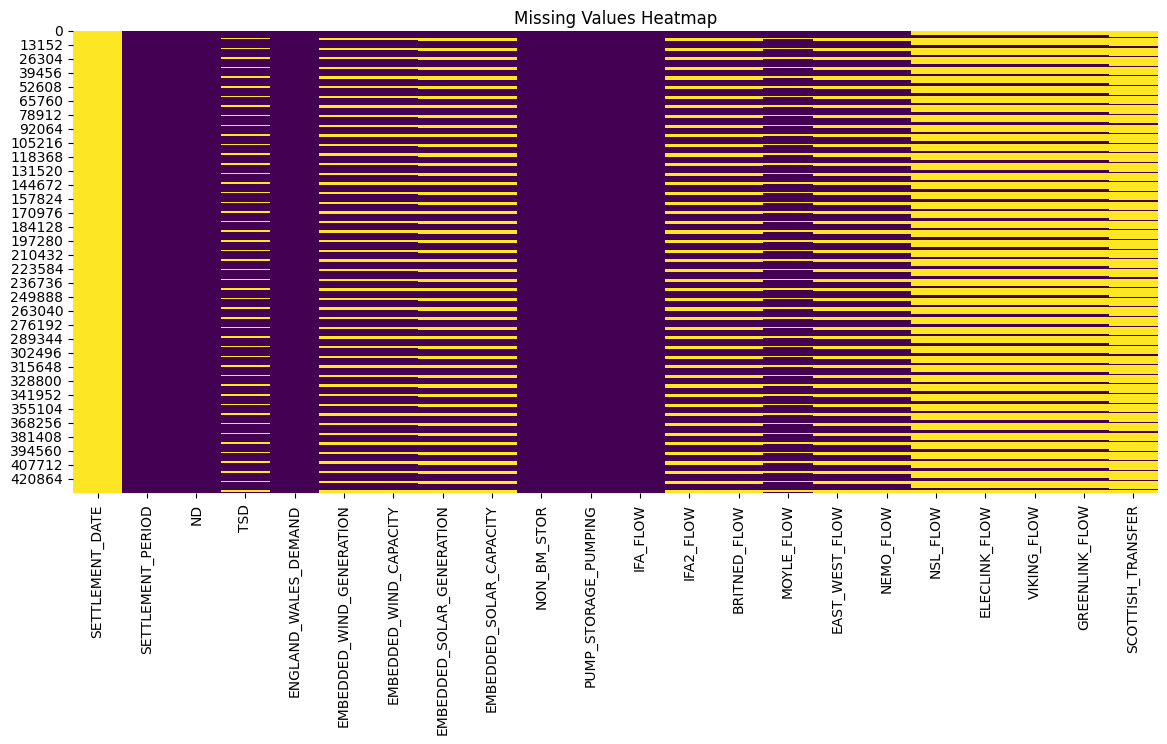

In [56]:

# 4. Visualize missing data heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [57]:

# 5. Separate columns by type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {list(num_cols)}")
print(f"Categorical columns: {list(cat_cols)}")

Numerical columns: ['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD', 'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW', 'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW', 'VIKING_FLOW', 'GREENLINK_FLOW', 'SCOTTISH_TRANSFER']
Categorical columns: []


In [58]:
# 6. Summary stats for numerical columns
print(df[num_cols].describe())

       SETTLEMENT_DATE  SETTLEMENT_PERIOD             ND            TSD  \
count              0.0      434014.000000  434014.000000  363886.000000   
mean               NaN          24.500115   33356.066355   33266.062044   
std                NaN          13.853742    8520.564917    8841.033067   
min                NaN           1.000000   12803.000000       0.000000   
25%                NaN          12.250000   26489.000000   27070.000000   
50%                NaN          24.000000   32976.000000   32728.000000   
75%                NaN          36.000000   39692.000000   39438.000000   
max                NaN          50.000000   60333.000000   60560.000000   

       ENGLAND_WALES_DEMAND  EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
count         434014.000000             328846.000000           328846.000000   
mean           30276.803767               1214.371730             4144.955061   
std             7677.431497               1044.560271             2211.207279   


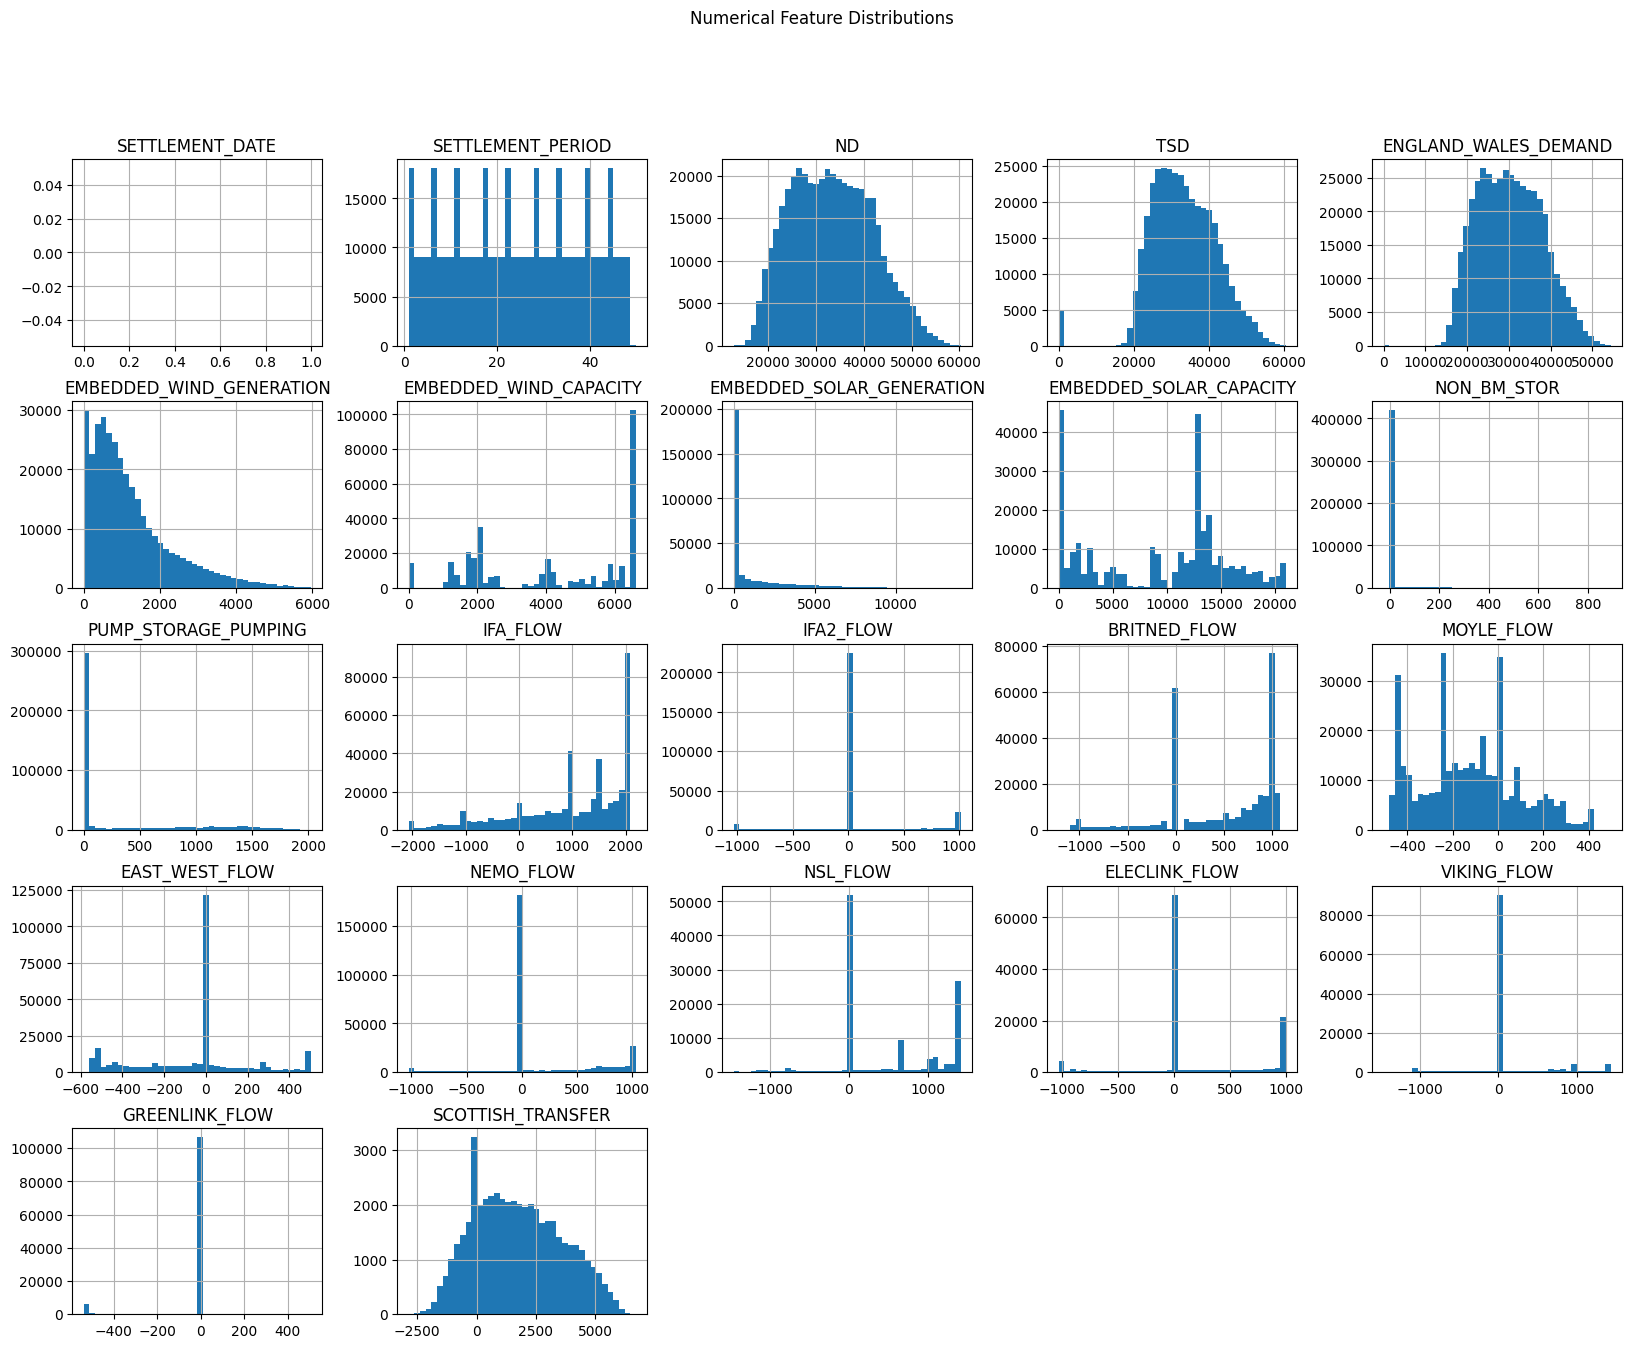

In [59]:
# 7. Histograms for numerical distributions
df[num_cols].hist(bins=40, figsize=(20,15))
plt.suptitle("Numerical Feature Distributions")
plt.show()

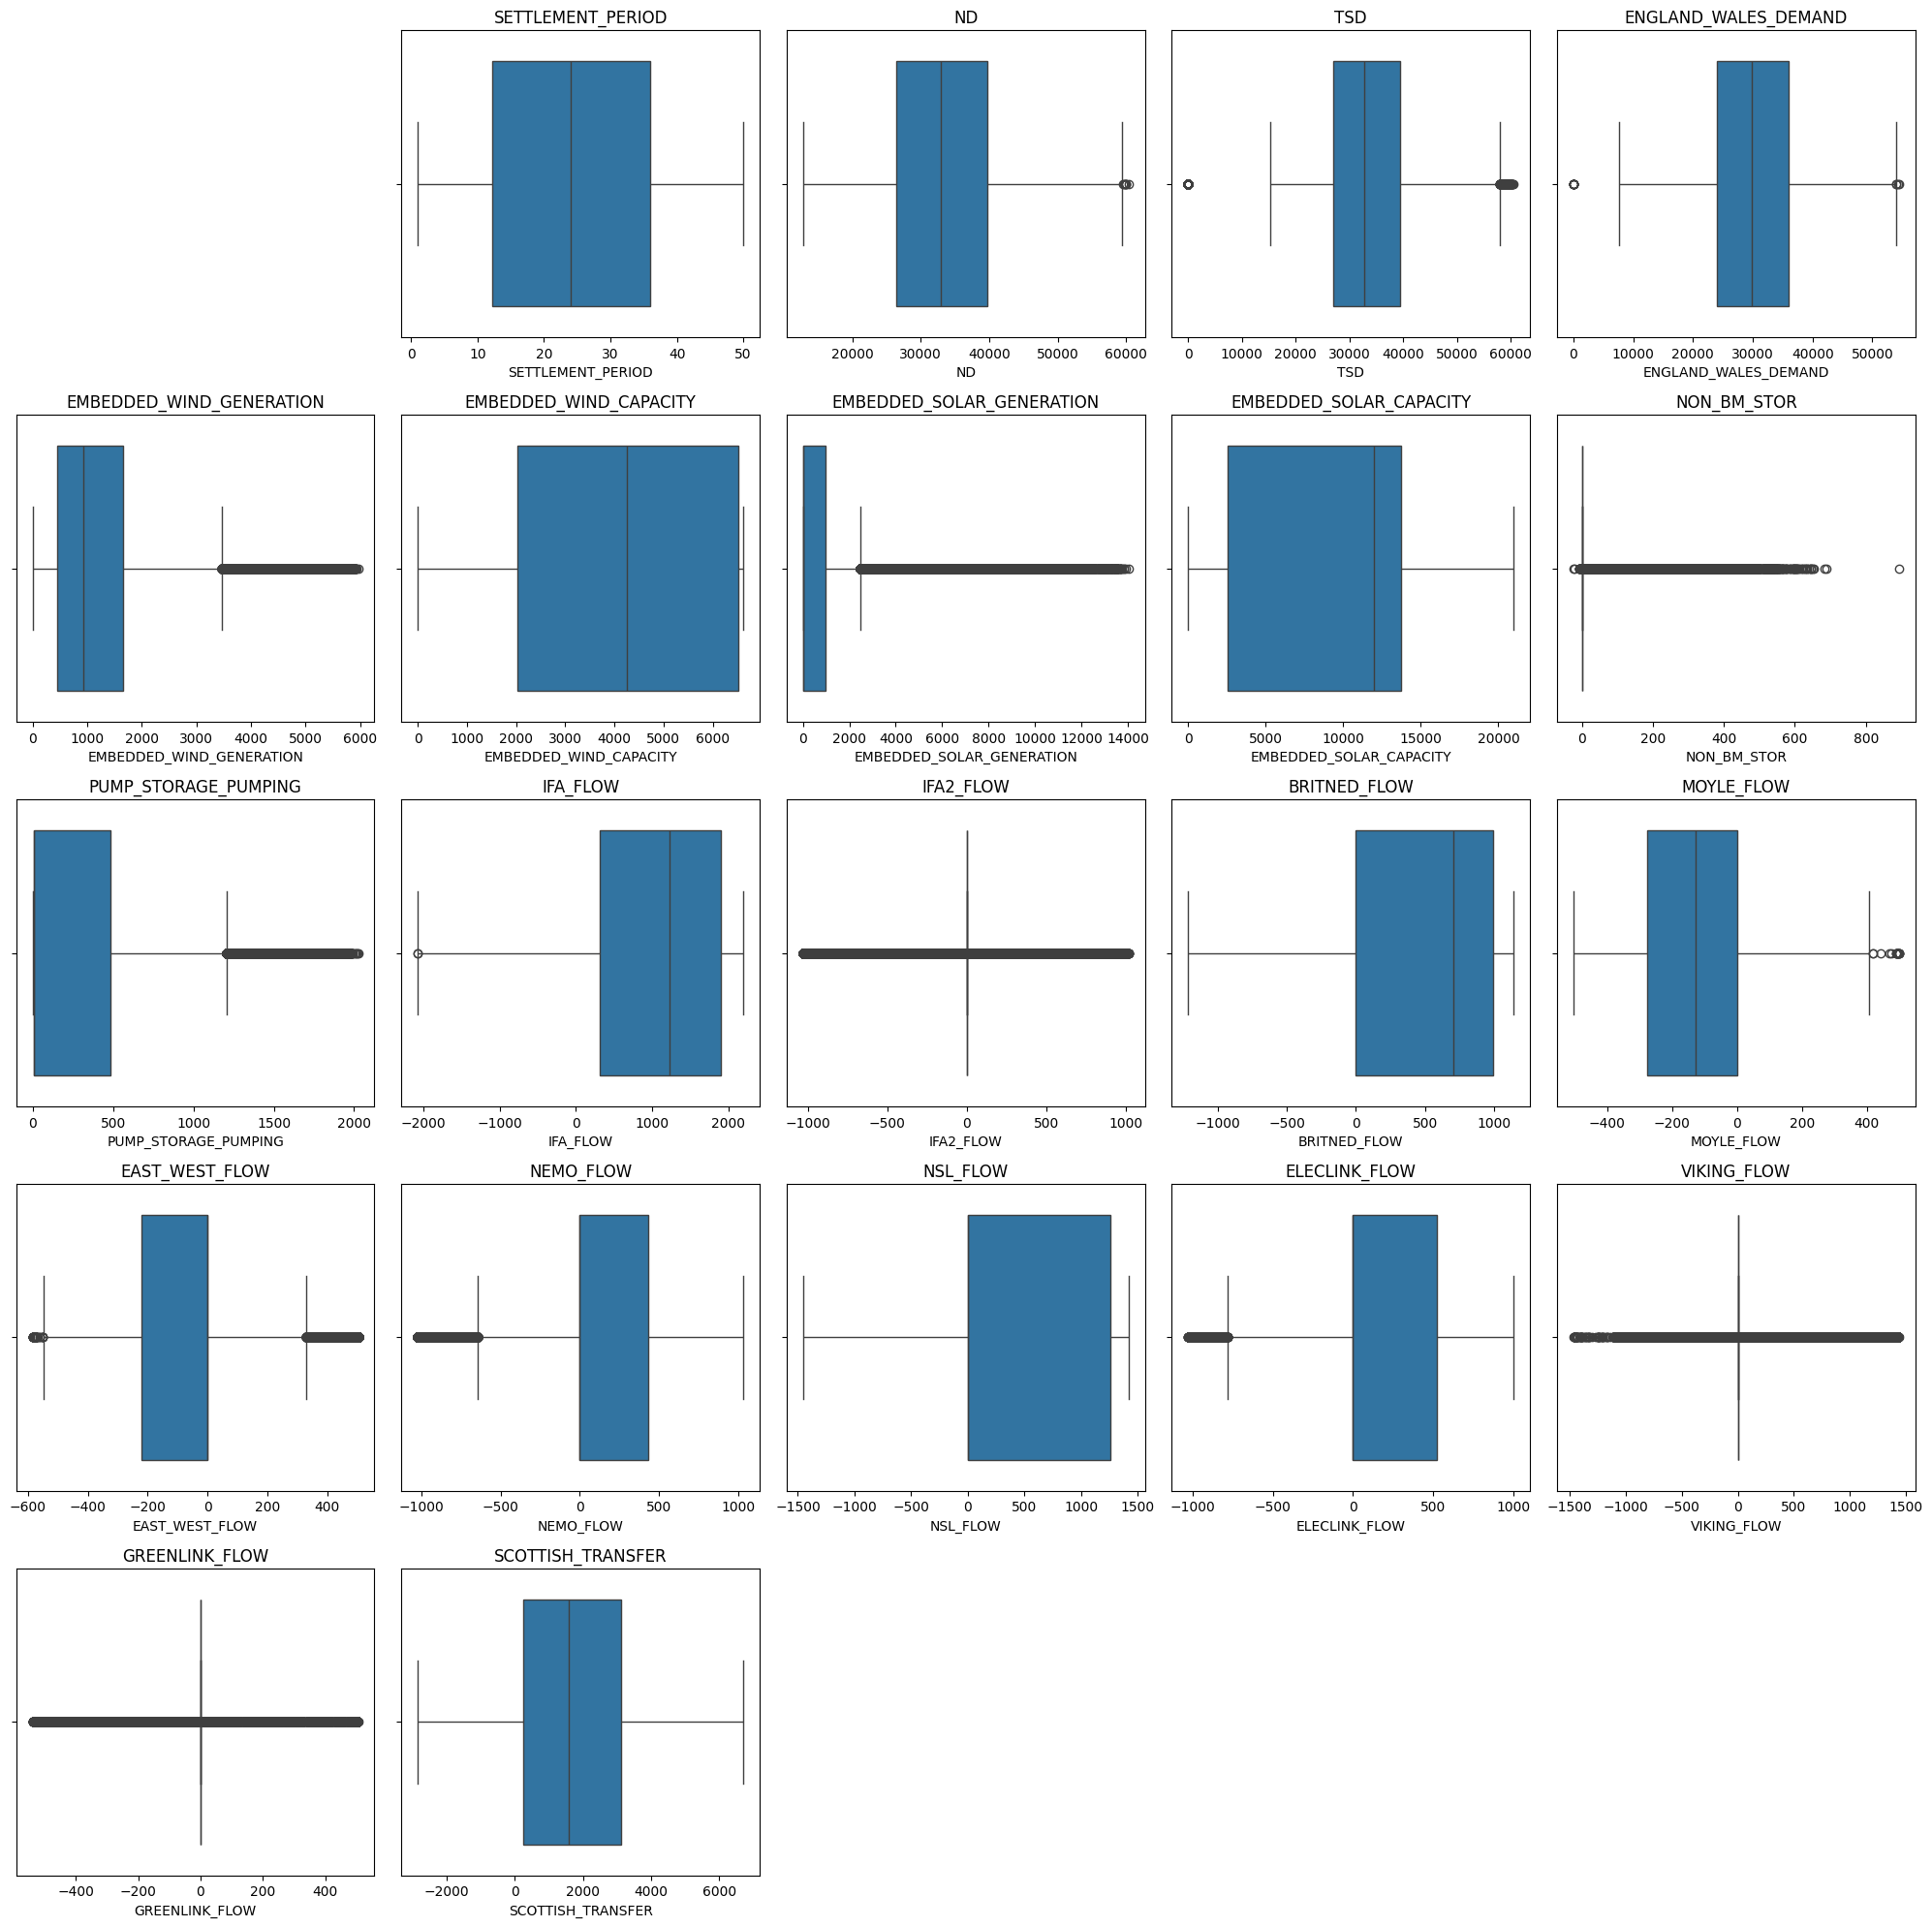

In [60]:
# 8. Boxplots to detect outliers
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)

ncols = 5
nrows = math.ceil(num_plots / ncols)

plt.figure(figsize=(ncols * 4, nrows * 4))

for i, col in enumerate(num_cols):
    data = df[col].dropna()  # Drop NaNs for plotting
    # Skip columns if empty after dropping NaNs or if constant
    if data.empty or data.nunique() <= 1:
        continue  # Skip plotting this column
    
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(x=data)
    plt.title(col)

plt.tight_layout()
plt.show()

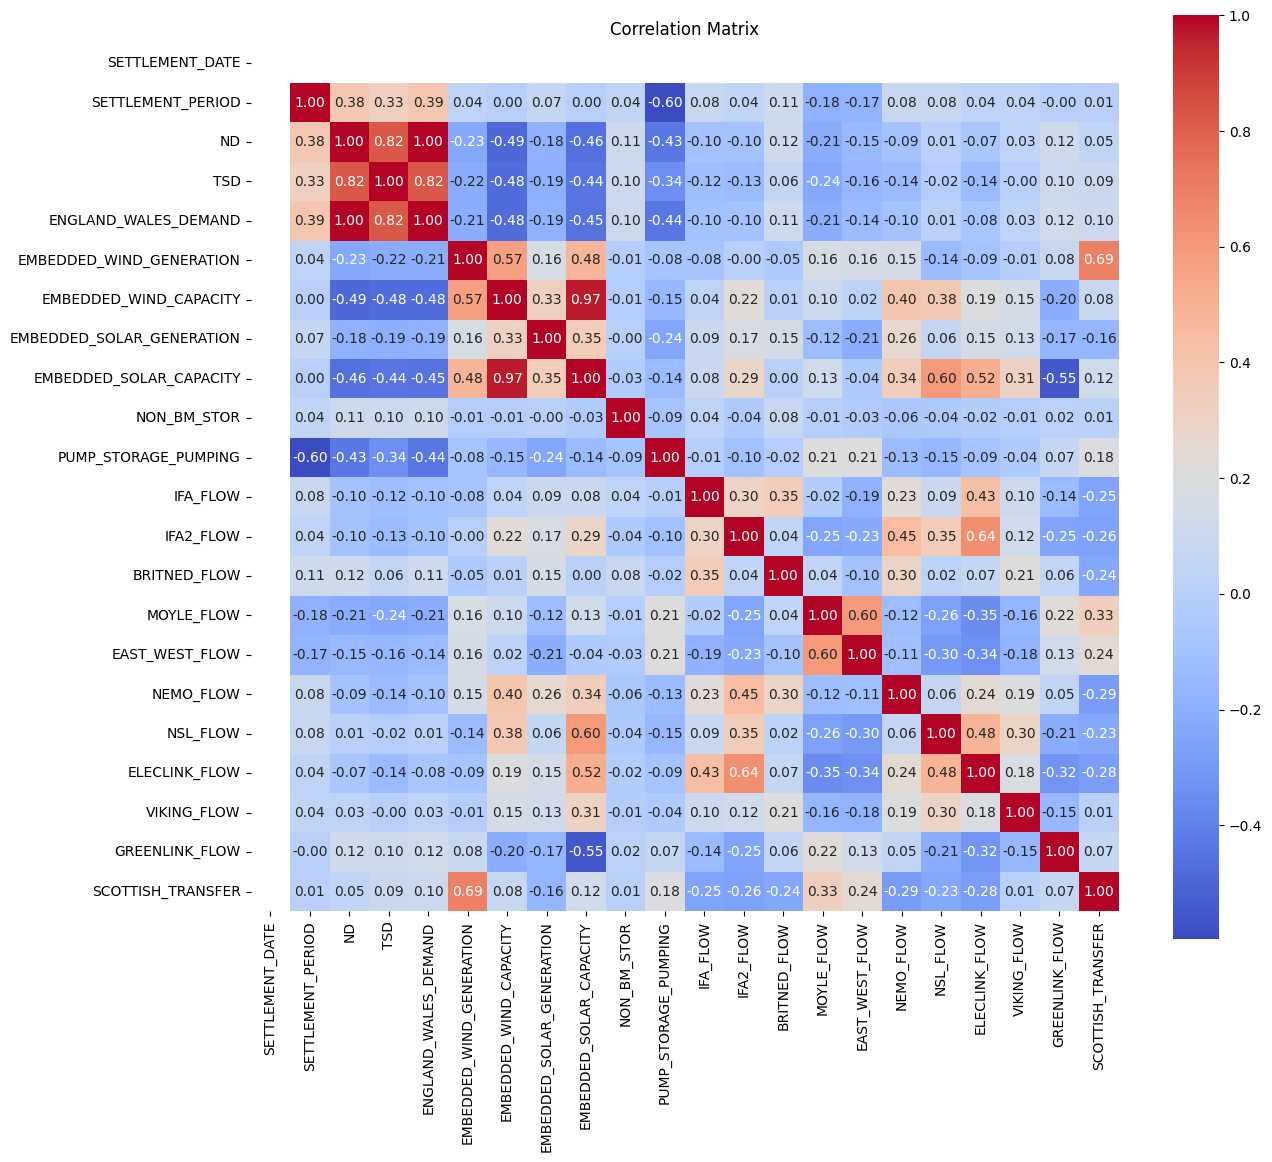

In [61]:
# 9. Correlation matrix among numerical features
plt.figure(figsize=(14,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# cleaning

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# === 2. Drop Redundant & Near-Empty Columns ===
# ND, TSD, ENGLAND_WALES_DEMAND are nearly perfectly correlated—keep just one.
# Also drop columns with very high missingness and those with only one unique value (constants).
redundant = ['ND', 'TSD']
near_empty = ['NSL_FLOW', 'ELECLINK_FLOW', 'VIKING_FLOW', 'GREENLINK_FLOW', 'SCOTTISH_TRANSFER']
constant_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
cols_to_drop = list(set(redundant + near_empty + constant_cols))
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns: {cols_to_drop}")

Dropped columns: ['VIKING_FLOW', 'ND', 'SETTLEMENT_DATE', 'ELECLINK_FLOW', 'GREENLINK_FLOW', 'TSD', 'NSL_FLOW', 'SCOTTISH_TRANSFER']


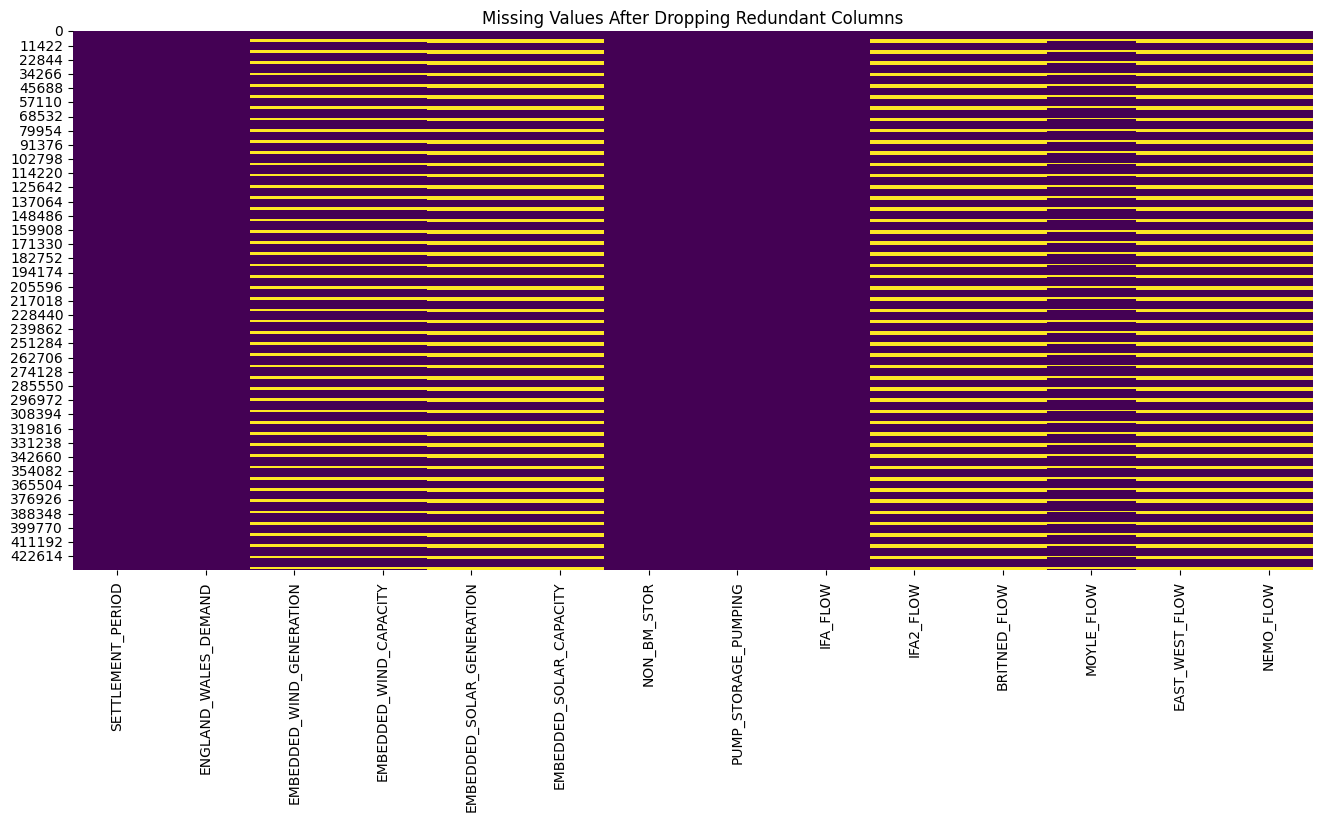

In [64]:
# Visualize missing values after dropping columns
plt.figure(figsize=(16, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Dropping Redundant Columns')
plt.show()

In [65]:
# === 3. Drop Columns with >50% Missing Values ===
missing_pct = df.isnull().mean()
high_missing_cols = missing_pct[missing_pct > 0.5].index.tolist()
df = df.drop(columns=high_missing_cols)
print(f"Dropped high-missing columns: {high_missing_cols}")

Dropped high-missing columns: []


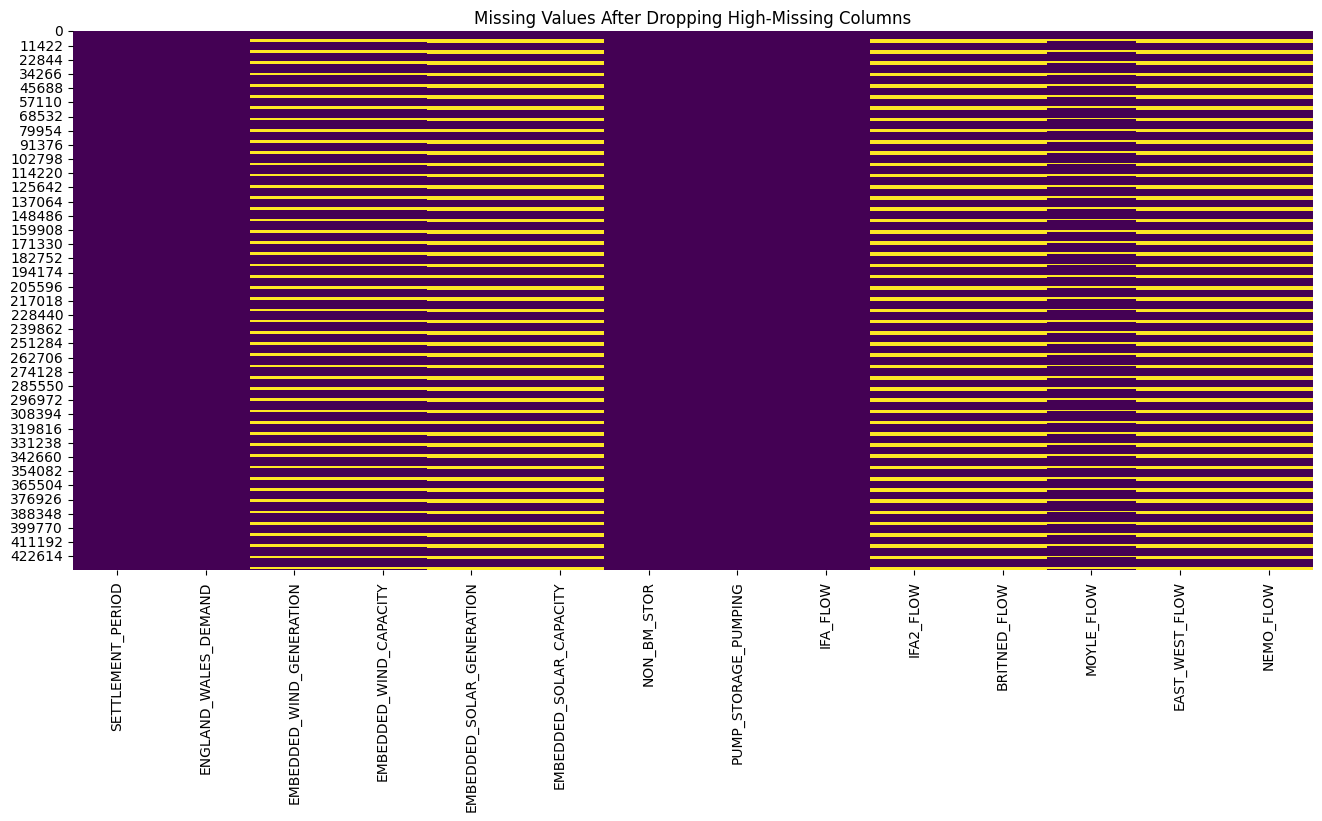

In [66]:
# Visualize again to confirm progress
plt.figure(figsize=(16, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Dropping High-Missing Columns')
plt.show()

In [67]:
# === 4. Fill Remaining Missing Values (Median for Numeric) ===
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)
    print(f"{col}: imputed missing values with median {median}")

SETTLEMENT_PERIOD: imputed missing values with median 24.0
ENGLAND_WALES_DEMAND: imputed missing values with median 29906.0
EMBEDDED_WIND_GENERATION: imputed missing values with median 925.0
EMBEDDED_WIND_CAPACITY: imputed missing values with median 4260.0
EMBEDDED_SOLAR_GENERATION: imputed missing values with median 0.0
EMBEDDED_SOLAR_CAPACITY: imputed missing values with median 12000.0
NON_BM_STOR: imputed missing values with median 0.0
PUMP_STORAGE_PUMPING: imputed missing values with median 11.0
IFA_FLOW: imputed missing values with median 1221.0
IFA2_FLOW: imputed missing values with median 0.0
BRITNED_FLOW: imputed missing values with median 708.0
MOYLE_FLOW: imputed missing values with median -129.0
EAST_WEST_FLOW: imputed missing values with median 0.0
NEMO_FLOW: imputed missing values with median 0.0


In [68]:
# Show count of remaining missing values (should be near zero)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
SETTLEMENT_PERIOD            0
ENGLAND_WALES_DEMAND         0
EMBEDDED_WIND_GENERATION     0
EMBEDDED_WIND_CAPACITY       0
EMBEDDED_SOLAR_GENERATION    0
EMBEDDED_SOLAR_CAPACITY      0
NON_BM_STOR                  0
PUMP_STORAGE_PUMPING         0
IFA_FLOW                     0
IFA2_FLOW                    0
BRITNED_FLOW                 0
MOYLE_FLOW                   0
EAST_WEST_FLOW               0
NEMO_FLOW                    0
dtype: int64


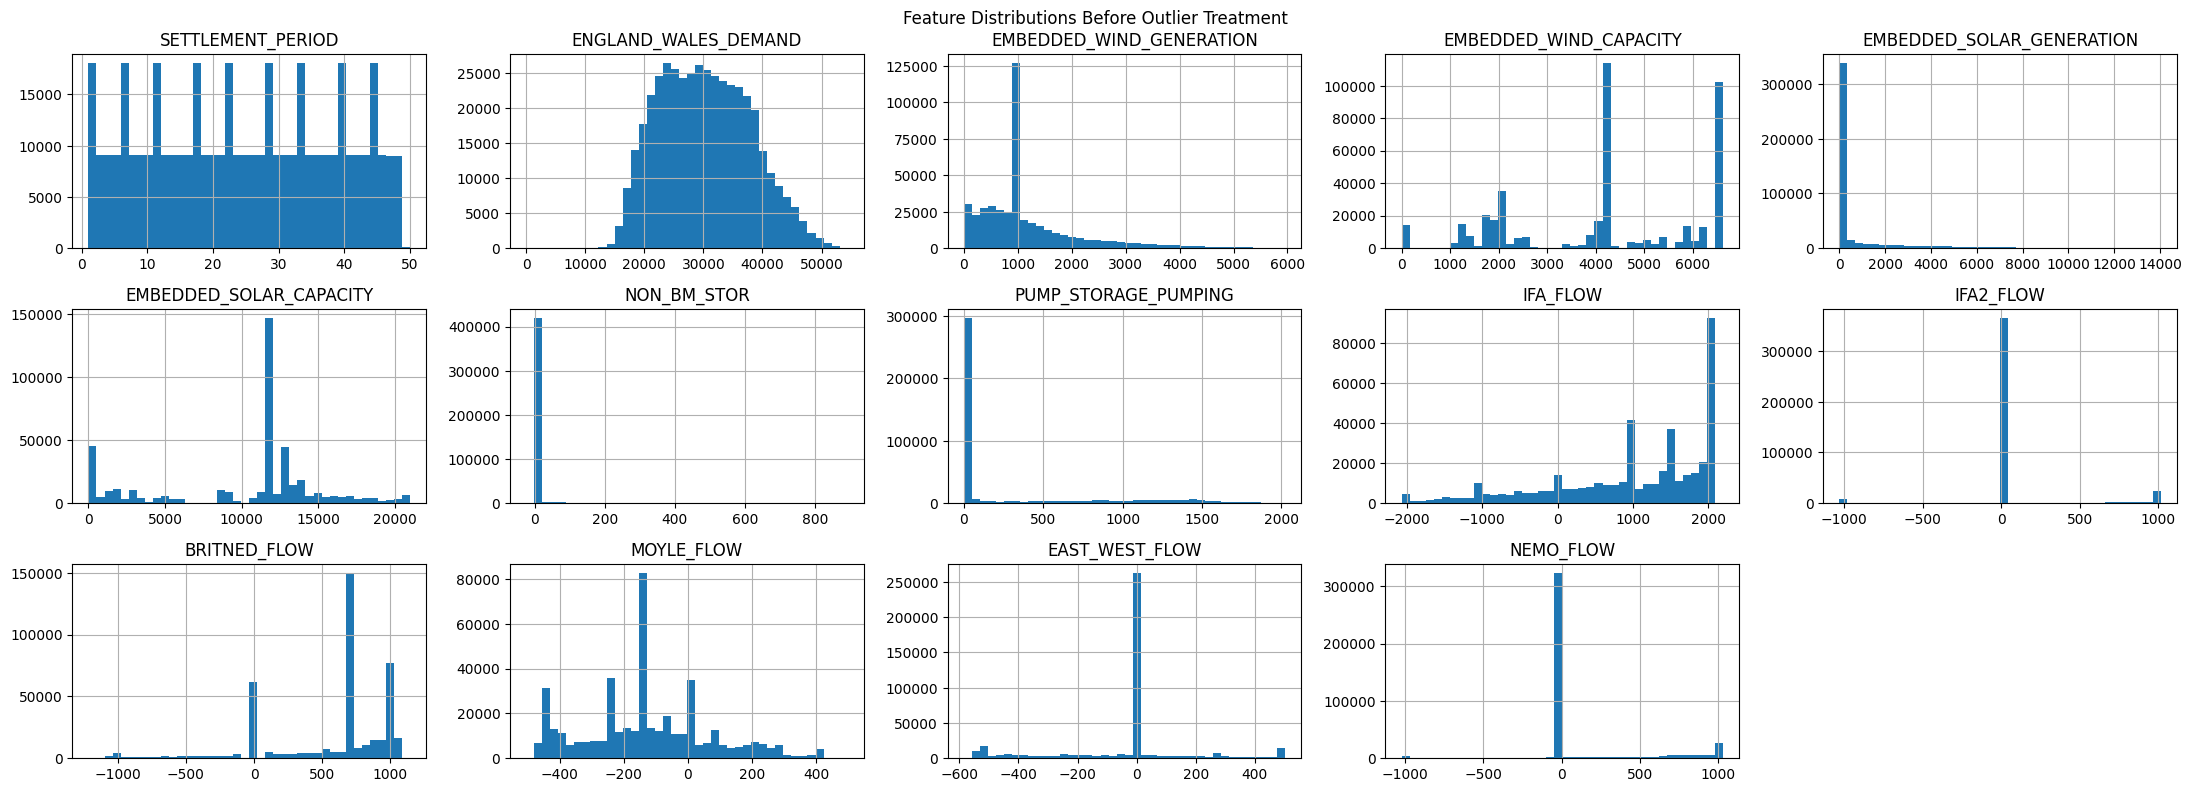

In [69]:
# === 5. Visualize Distributions Before Outlier Treatment ===
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=40, figsize=(22, 13), layout=(5, 5))
plt.suptitle("Feature Distributions Before Outlier Treatment")
plt.tight_layout()
plt.show()

In [70]:
# === 6. Outlier Capping (0.5th and 99.5th Percentiles) ===
for col in num_cols:
    lower = df[col].quantile(0.005)
    upper = df[col].quantile(0.995)
    df[col] = df[col].clip(lower=lower, upper=upper)
    print(f"{col}: capped to [{lower}, {upper}]")


SETTLEMENT_PERIOD: capped to [1.0, 48.0]
ENGLAND_WALES_DEMAND: capped to [15814.0, 49259.935]
EMBEDDED_WIND_GENERATION: capped to [0.0, 4847.0]
EMBEDDED_WIND_CAPACITY: capped to [0.0, 6622.0]
EMBEDDED_SOLAR_GENERATION: capped to [0.0, 8715.0]
EMBEDDED_SOLAR_CAPACITY: capped to [0.0, 20993.0]
NON_BM_STOR: capped to [0.0, 258.0]
PUMP_STORAGE_PUMPING: capped to [0.0, 1832.0]
IFA_FLOW: capped to [-2044.0, 2006.0]
IFA2_FLOW: capped to [-1029.0, 992.0]
BRITNED_FLOW: capped to [-1034.0, 1059.0]
MOYLE_FLOW: capped to [-456.0, 400.0]
EAST_WEST_FLOW: capped to [-536.0, 504.0]
NEMO_FLOW: capped to [-1020.0, 1019.0]


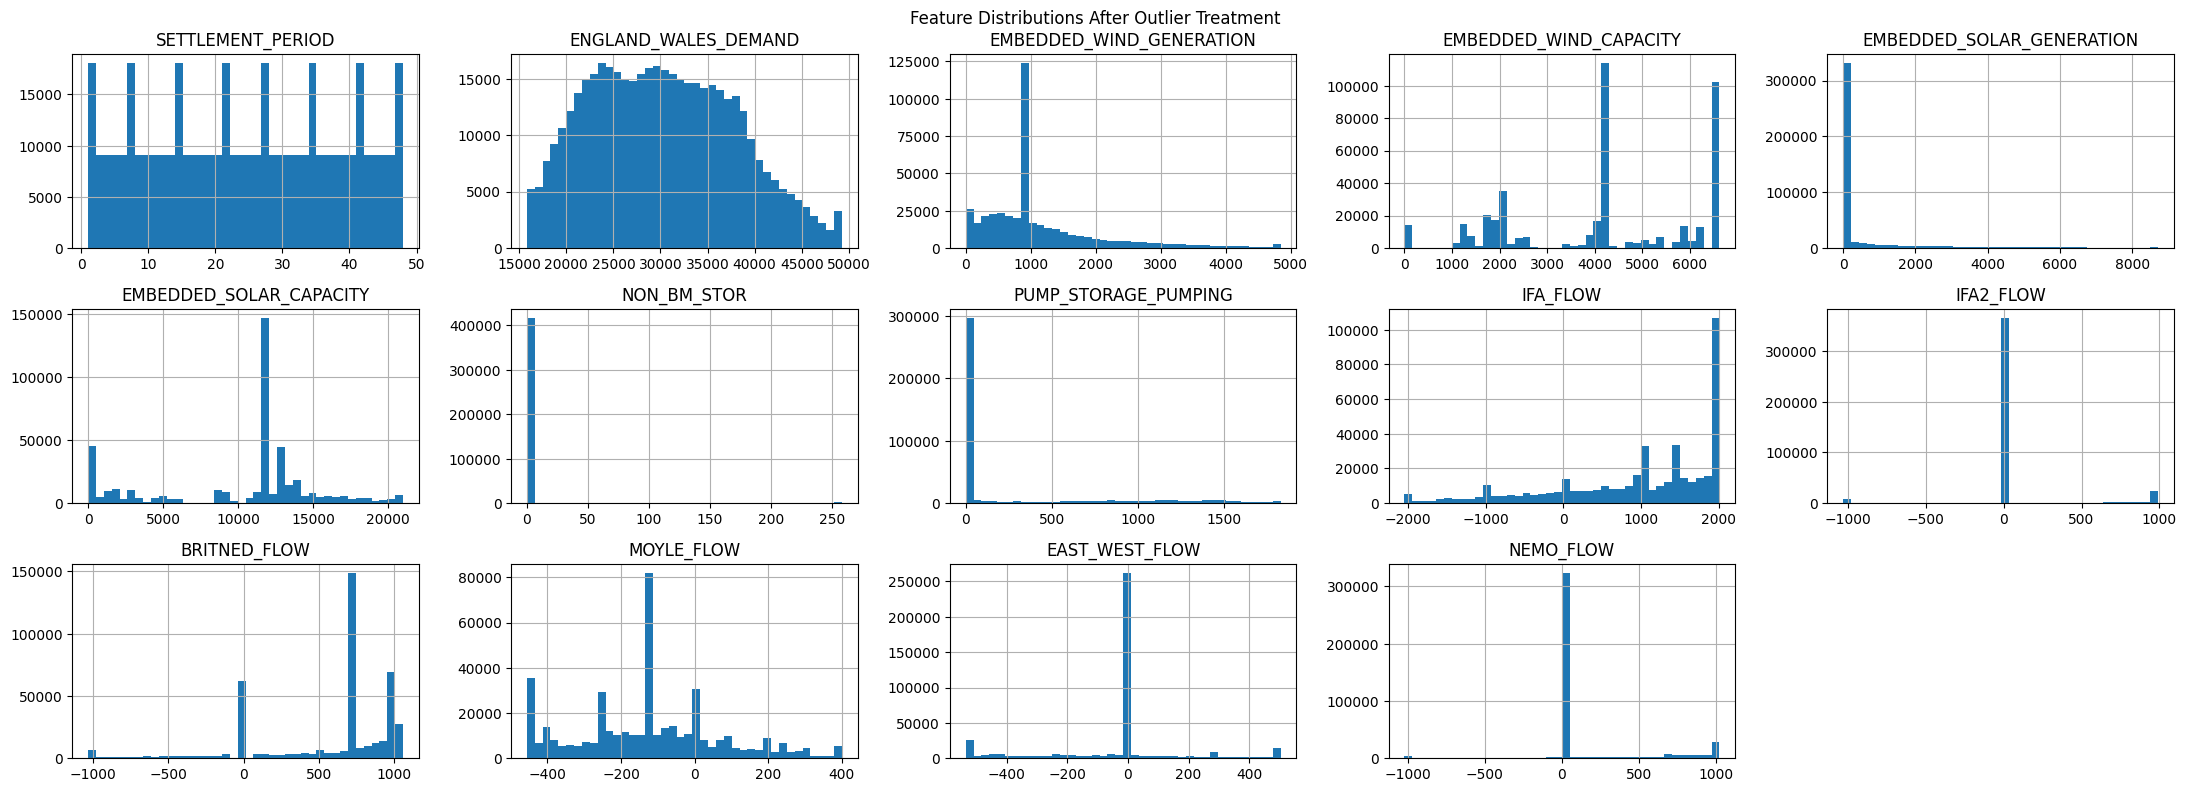

In [71]:
# Visualize Distributions After Outlier Treatment
df[num_cols].hist(bins=40, figsize=(22, 13), layout=(5, 5))
plt.suptitle("Feature Distributions After Outlier Treatment")
plt.tight_layout()
plt.show()

In [72]:
# === 7. Feature Engineering ===
# If SETTLEMENT_DATE exists, extract month and day-of-week
if 'SETTLEMENT_DATE' in df.columns:
    df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'], errors='coerce')
    df['month'] = df['SETTLEMENT_DATE'].dt.month
    df['day_of_week'] = df['SETTLEMENT_DATE'].dt.dayofweek
    print("Added 'month' and 'day_of_week' features.")

In [73]:
# Visualize new engineered features
if 'month' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='month', data=df)
    plt.title("Distribution of Records by Month")
    plt.show()
if 'day_of_week' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='day_of_week', data=df)
    plt.title("Distribution of Records by Day of Week")
    plt.show()

In [74]:
# === 8. Remove Remaining Highly Correlated Columns (>0.95) ===
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(columns=to_drop_corr)
print(f"Dropped extra highly correlated columns: {to_drop_corr}")

Dropped extra highly correlated columns: []


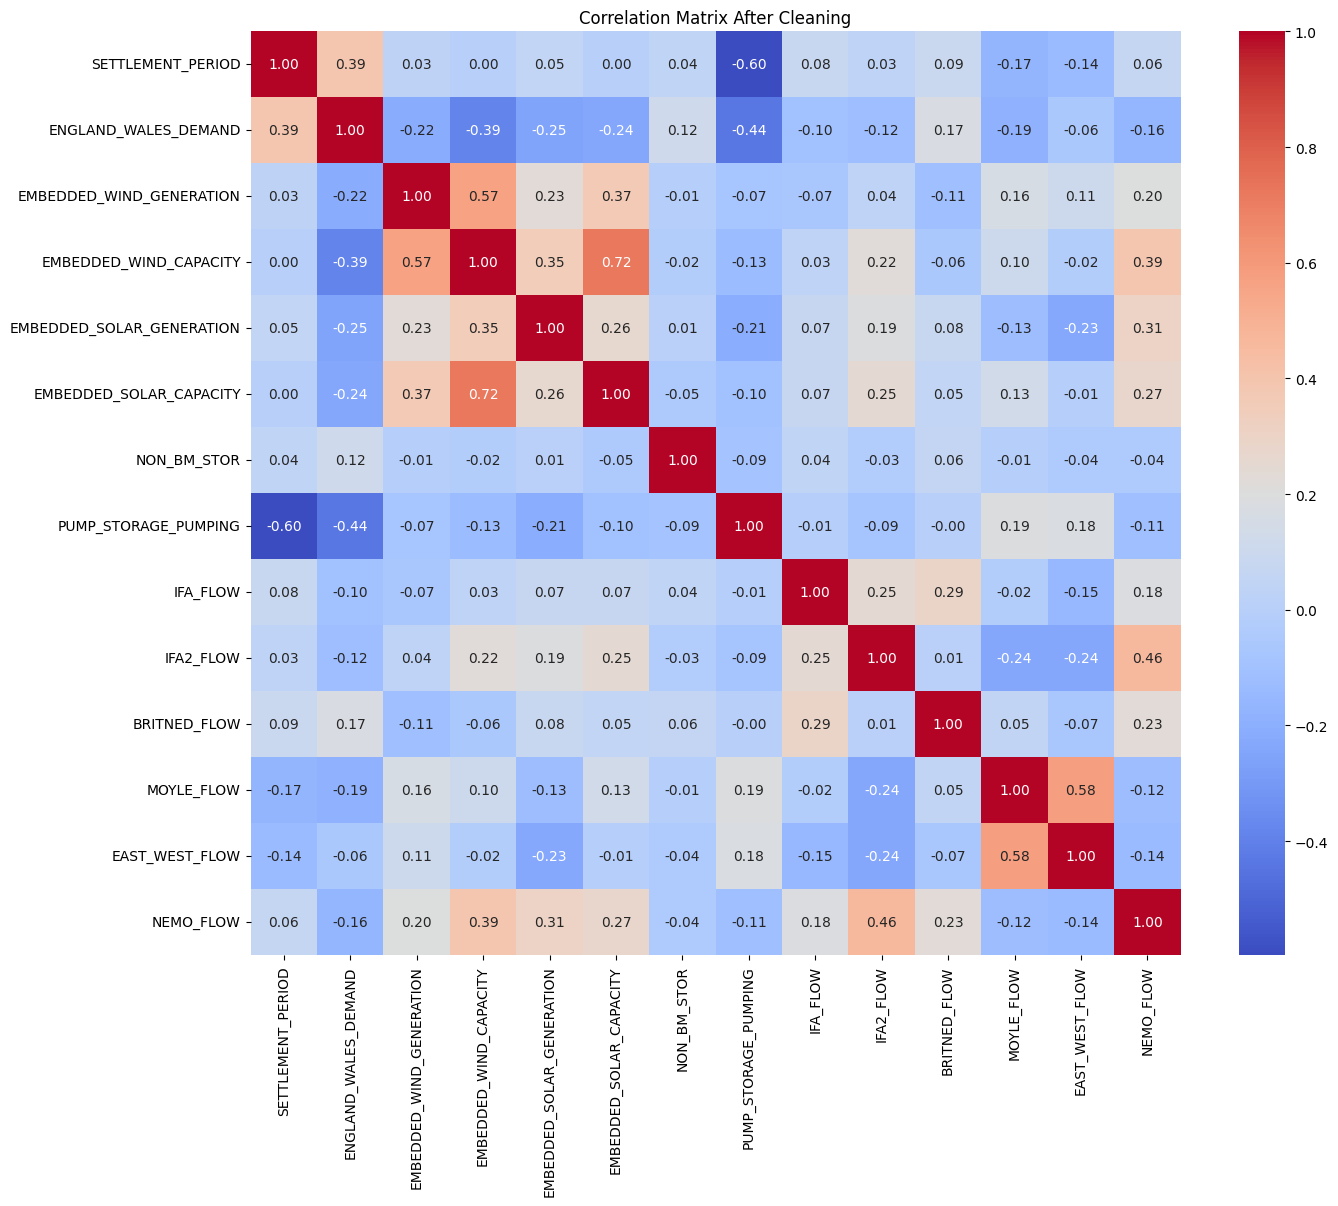

In [75]:
# Visualize correlation matrix (heatmap) after cleaning
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Cleaning')
plt.show()

In [76]:
# === 9. Final Save ===
df.to_csv('../Data/cleaned_and_augmented_electricity_data.csv', index=False)
print("Saved cleaned and augmented data to 'cleaned_and_augmented_data.csv'")

Saved cleaned and augmented data to 'cleaned_and_augmented_data.csv'
